In [1]:
import pandas as pd

In [12]:
from time import sleep
import random as r
from bs4 import BeautifulSoup
import re
import requests

In [19]:
BASE_URL = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area'
HEADER = {'User-Agent': 'Moziila/5.0 (X11; Linux x86_64)'}

r.seed(42)

In [20]:
def delay(seconds):
    print(f'Sleeping for {seconds} second(s)...')
    sleep(seconds)

def html_content(path):
    return requests.get(BASE_URL + path, HEADER)

def scrape(ms=10):
    html = html_content('')
    soup = BeautifulSoup(html, 'lxml')
    table = soup.find('table', {'class' : 'wikitable sortable jquery-tablesorter'})
    print(html)
    delay(ms)

In [5]:
# scrape()

In [21]:
with open('your_posts_1.html', encoding='utf-8') as f:
    soup = BeautifulSoup(f, 'html.parser')

In [22]:
contents = soup.find_all('div', class_='_2pin')

In [23]:
posts = [c.get_text() for c in contents]
len(posts)

46

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

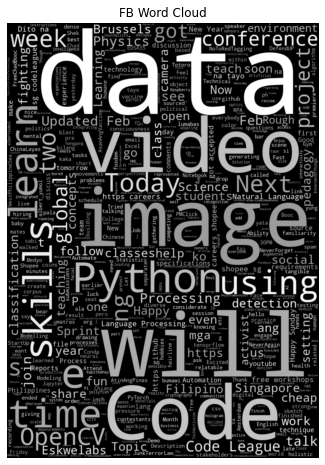

In [25]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % r.randint(60, 100)

mask = np.array(Image.open('bg.png'))

words = ''.join(posts)
wordcloud = WordCloud(background_color='black', max_words=2000, width=1024, height=720, mask=mask)
wordcloud.generate(words)

plt.figure(figsize=(20, 8))
plt.title('FB Word Cloud')
# plt.imshow(wordcloud.recolor(color_func=color_mask, random_state=42), interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=42), interpolation='bilinear')
plt.axis('off')
plt.show()

In [89]:
YELP_BASE_URL = 'https://api.yelp.com/v3/'
client_id = 'VCFGQLeK0EfCjRhwi0u8fQ'
api_key = 'iZo9jxMyOKeq--JjyBQiDc333kSd7Ri6aRlUw8W7OG4TRDD7Vp0ysi6NllY9unRMIbRkknTS55Xh9TzgQaU7Xdn0Q6lHXpzKhx7ngrh4yOaZuLrFhTvlhJsEIyE-YHYx'

In [13]:

def search(location, term):
    url = YELP_BASE_URL + 'businesses/search'
    header = {'User-Agent': 'Moziila/5.0 (X11; Linux x86_64)', 'Authorization' : f'Bearer {api_key}'}
    data = []

    for offset in range(0, 1000, 50):
        params = {
            'limit' : 50,
            'location' : location.replace(' ', '+'),
            'term' : term.replace(' ', '+'),
            'offset' : offset
        }

        response = requests.get(businesses_search, headers=header, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
        else:
            print(f'Bad request: {response.status_code}')
            break

    return data




In [107]:
# !pip install selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select # select = Select(elements)

In [108]:
## Shopee Activity (Trial 2)
import re

PATH = '/usr/local/bin/chromedriver'
driver = webdriver.Chrome(PATH)
driver.get('https://shopee.ph/search?keyword=gaming%20laptop&minPrice=171000&noCorrection=true&order=desc&page=0&sortBy=price')

try:
    # sleep(5)
    driver.implicitly_wait(5)

    main = WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.ID, 'main'))
    )

    items = main.find_elements_by_class_name('col-xs-2-4')
    print(f'Number of Items: {len(items)}\n')
    prices = 0
    for i, item in enumerate(items):
        driver.maximize_window()
        driver.execute_script('window.scrollBy(0, 1000)', '')
        sleep(.1)
        driver.execute_script('window.scrollBy(0, document.body.scrollHeight)', '') # til end
        
        a = item.find_element_by_tag_name('div')

        price = re.findall("₱\\d{1,3},\\d{3}", item.text)
        price = price[len(price)- 1].replace('₱', '').replace(',','')
        print(f'Running-Total: {prices} + {price}')
        prices += float(price)

except Exception as e:
    print(e)
finally:
    print(f'\n\nTotal: {prices}')
    driver.quit()



Number of Items: 50

Running-Total: 0 + 220000
Running-Total: 220000.0 + 171010
Running-Total: 391010.0 + 674441
Running-Total: 1065451.0 + 446927
Running-Total: 1512378.0 + 361800
Running-Total: 1874178.0 + 418308
Running-Total: 2292486.0 + 321439
Running-Total: 2613925.0 + 311976
Running-Total: 2925901.0 + 462277
Running-Total: 3388178.0 + 281569
Running-Total: 3669747.0 + 263672
Running-Total: 3933419.0 + 256507
Running-Total: 4189926.0 + 248158
Running-Total: 4438084.0 + 245359
Running-Total: 4683443.0 + 244022
Running-Total: 4927465.0 + 240544
Running-Total: 5168009.0 + 235544
Running-Total: 5403553.0 + 233405
Running-Total: 5636958.0 + 230023
Running-Total: 5866981.0 + 228700
Running-Total: 6095681.0 + 230023
Running-Total: 6325704.0 + 216768
Running-Total: 6542472.0 + 216103
Running-Total: 6758575.0 + 266810
Running-Total: 7025385.0 + 210036
Running-Total: 7235421.0 + 208650
Running-Total: 7444071.0 + 208220
Running-Total: 7652291.0 + 237203
Running-Total: 7889494.0 + 205229
Run

In [14]:
## Shopee Activity (Trial 1)

def search_shopee(keyword='gaming%20laptop'):
    # url = f'https://shopee.ph/search?keyword={keyword}&order=desc&page=0&sortBy=price' #&trackingId=searchhint-1614685936-bc643cd1-7b4d-11eb-8461-b4969146142c'
    # header = {'User-Agent': 'Moziila/5.0 (X11; Linux x86_64)'}
    # data = []

    # html = requests.get(url, HEADER).text
    # soup = BeautifulSoup(html, 'html.parser')
        
    with open('shopee.html', 'r') as f:
        soup = BeautifulSoup(f.read(), 'lxml')
        data = soup.find_all('script', type="application/ld+json")

    return data

In [13]:
search_shopee()


<html><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no" name="viewport"/><meta content="a083bf21014868b179d1143a7bfc8b8014b4bea3" name="shopee:git-sha"/><meta content="pc-v4.70.3" name="shopee:version"/><script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-CB0044GVTM&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" src="https://connect.facebook.net/signals/config/1478059392491608?v=2.9.33&amp;r=stable"></script><script async="" src="//connect.facebook.net/en_US/fbevents.js"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-WJZQSJF"></script><script data-webfe="config">window.__PAGE_ID__ = 1;
  window.__LOCALE__ = 'PH';
  window.__ENV__

("{'type'", ':', "'application/ld+json'})")

In [1]:
# conda install selenium

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from time import sleep

In [4]:
# # create object for chrome options
# chrome_options = Options()
# base_url = 'https://shopee.com.my/shop/13377506/search?page=0&sortBy=sales'

# # set chrome driver options to disable any popup's from the website
# # to find local path for chrome profile, open chrome browser
# # and in the address bar type, "chrome://version"
# chrome_options.add_argument('disable-notifications')
# chrome_options.add_argument('--disable-infobars')
# chrome_options.add_argument('start-maximized')
# chrome_options.add_argument('user-data-dir=C:\\Users\\username\\AppData\\Local\\Google\\Chrome\\User Data\\Default')
# # To disable the message, "Chrome is being controlled by automated test software"
# chrome_options.add_argument("disable-infobars")
# # Pass the argument 1 to allow and 2 to block
# chrome_options.add_experimental_option("prefs", { 
#     "profile.default_content_setting_values.notifications": 2
#     })
# # invoke the webdriver
# browser = webdriver.Chrome(executable_path = r'/Applications/Chrome.app',
#                           options = chrome_options)
# browser.get(base_url)
# delay = 5 #secods

In [105]:
#